In [1]:
from iotools import read_AsciiGrid
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import numpy as np
from overlandflow import OverlandFlowModel

In [2]:
ffdir = r'/Users/jpnousu/SpaFHy_RUNS/krycklan/gis/25m_3case/flow_direction.asc'
fflowacc = r'/Users/jpnousu/SpaFHy_RUNS/krycklan/gis/25m_3case/flow_accumulation.asc'
fstreams = r'/Users/jpnousu/SpaFHy_RUNS/krycklan/gis/25m_3case/stream_mask.asc'
flakes = r'/Users/jpnousu/SpaFHy_RUNS/krycklan/gis/25m_3case/lake_mask.asc'

fdir = read_AsciiGrid(ffdir)[0]
flowacc = read_AsciiGrid(fflowacc)[0]
streams = read_AsciiGrid(fstreams)[0]
lakes = read_AsciiGrid(flakes)[0]

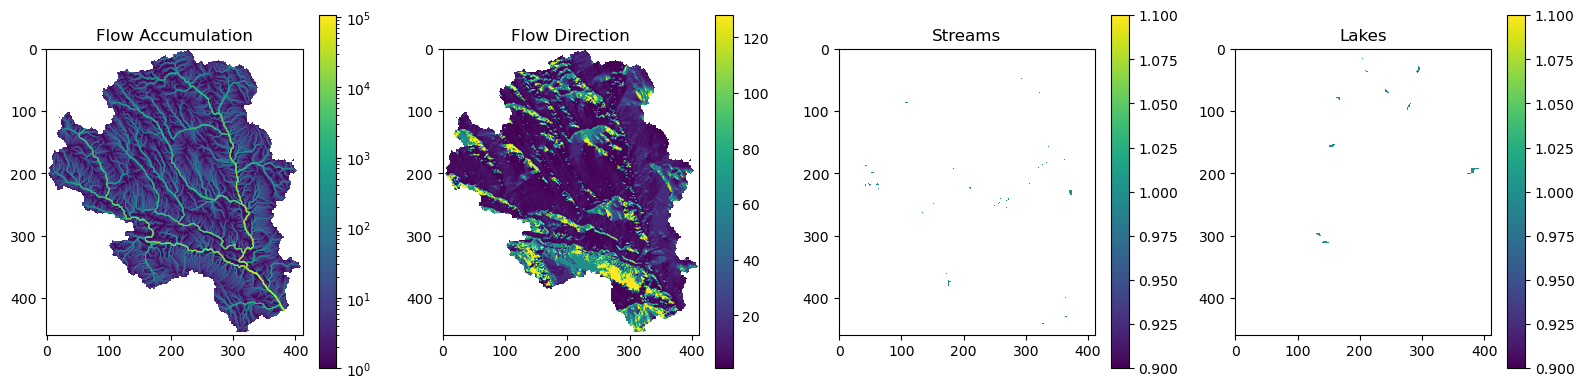

In [3]:
fig, axes = plt.subplots(1, 4, figsize=(16, 4))  # 1 row, 4 columns

# Data and titles
data_arrays = [flowacc, fdir, streams, lakes]
titles = ['Flow Accumulation', 'Flow Direction', 'Streams', 'Lakes']
norms = [
    LogNorm(vmin=np.nanmin(flowacc[flowacc > 0]), vmax=np.nanmax(flowacc)), 
    None, None, None  # Only 'flowacc' uses LogNorm
]

# Plot each dataset
for ax, data, title, norm in zip(axes, data_arrays, titles, norms):
    im = ax.imshow(data, norm=norm)#, cmap=cmap)
    fig.colorbar(im, ax=ax)
    ax.set_title(title)

plt.tight_layout()
plt.show()

In [4]:

model = OverlandFlowModel(flowacc, fdir, streams, lakes, MaxPondSto=0.05)

In [5]:
for t in range(1):
    pondsto = np.random.uniform(0, 0.2, size=flowacc.shape)  # Random value
    pondsto[np.isnan(flowacc)] = np.nan
    airspace = np.random.uniform(0, 0.1, size=flowacc.shape)  # Random value
    airspace[np.isnan(flowacc)] = np.nan
    
    results = model.run_timestep(pondsto, airspace)

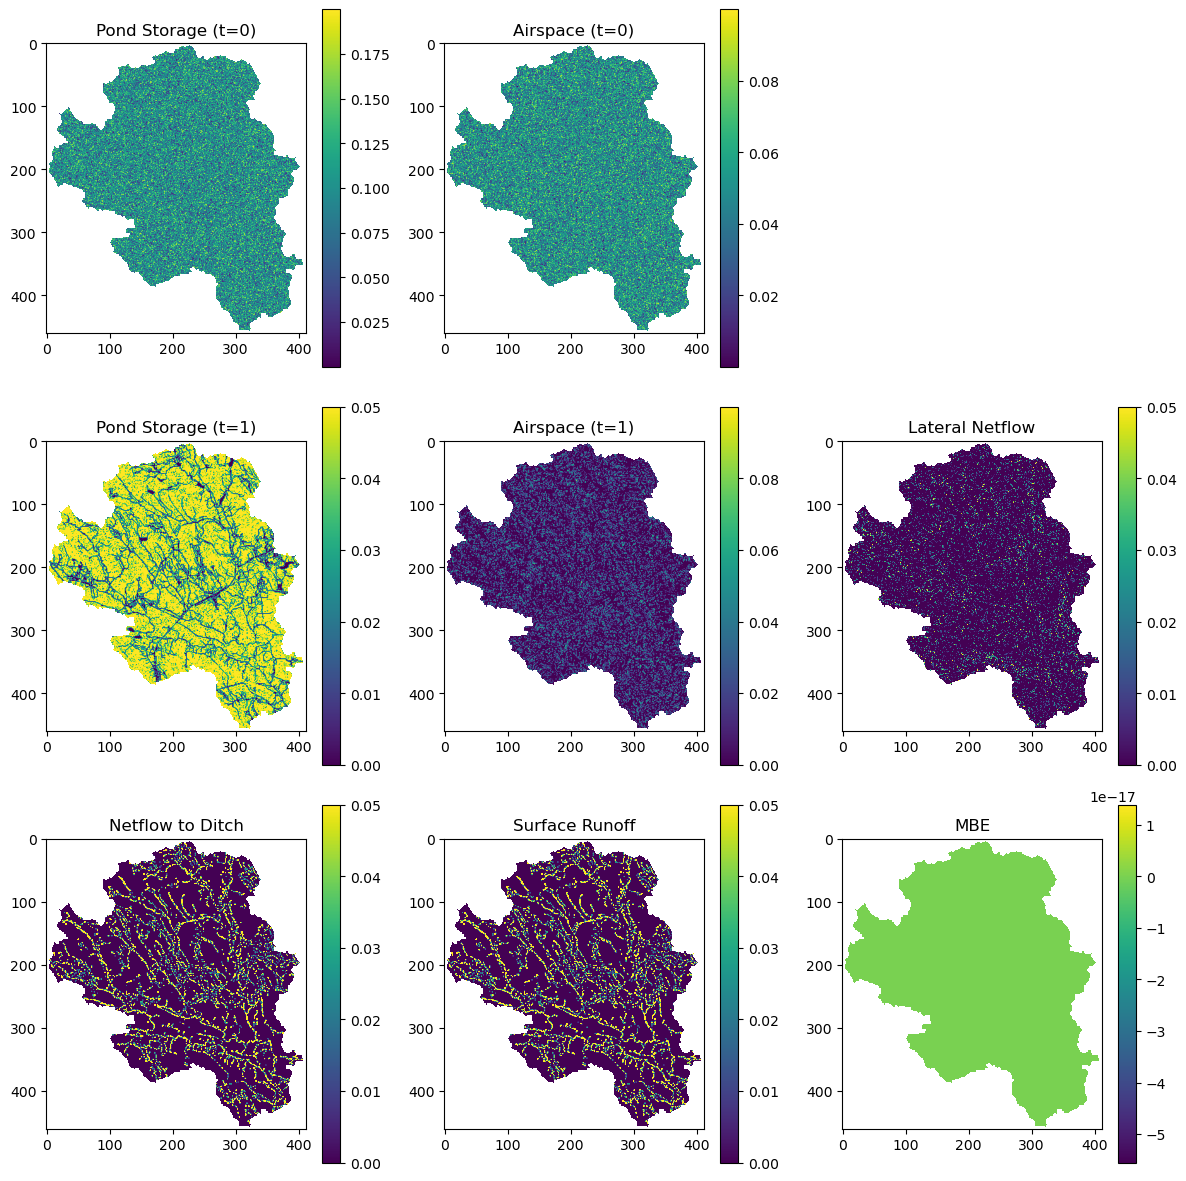

In [6]:
fig, axes = plt.subplots(3, 3, figsize=(12, 12)) 

data_arrays = [
    pondsto, airspace, None,
    results['pond_storage'], results['airspace'], 
    results['lateral_netflow'], results['netflow_to_ditch'],  # Second row
    results['surface_runoff'], results['mbe']   # Third row
]
titles = [
    'Pond Storage (t=0)', 'Airspace (t=0)', '',  
    'Pond Storage (t=1)', 'Airspace (t=1)', 
    'Lateral Netflow', 'Netflow to Ditch', 
    'Surface Runoff', 'MBE',  
]
vmins = [None, None, None, None, None, 0., 0., 0., None]
vmaxs = [None, None, None, None, None, 0.05, 0.05, 0.05, None]

# Plot each dataset
for ax, data, title, vmin, vmax in zip(axes.flat, data_arrays, titles, vmins, vmaxs):
    if data is not None:
        im = ax.imshow(data, vmin=vmin, vmax=vmax)
        fig.colorbar(im, ax=ax)
    else:
        ax.axis("off")
    ax.set_title(title)

plt.tight_layout()
plt.show()
